In [1]:
import sklearn 

In [2]:
import numpy as np 
from sklearn.base import BaseEstimator  

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass 

    def predict(self, X):
        pred = np.zeros( (X.shape[0], 1)) 
        for i in range( X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0 
            else:
                pred[i] = 1
        return pred

In [3]:
from sklearn.preprocessing import LabelEncoder 

# Null 처리 함수
def fillna(df):
    df.fillna({
        'Age': df['Age'].mean(),
        'Cabin': 'N',
        'Embarked': 'N',
        'Fare': 0
    }, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print(accuracy_score(y_test, mypredictions))



0.8324022346368715


In [5]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split 
from sklearn.base import BaseEstimator 
from sklearn.metrics import accuracy_score 
import numpy as np 
import pandas as pd 

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass 

    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool)

digits = load_digits()

print(digits.data)
print(digits.data.shape)
print(digits.target)
print(digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


In [6]:
digits.target ==7

array([False, False, False, ..., False, False, False], shape=(1797,))

In [7]:
y = (digits.target == 7).astype(int)
X_train,  X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [8]:
print(y_test.shape)
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print(accuracy_score(y_test, fakepred))

(450,)
0    405
1     45
Name: count, dtype: int64
0.9


In [9]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(y_test, fakepred)

# 오차 행렬
# True Negative, False Positive 
# False Negative, True Positive 

# 세로 축 negative, positive  
# 가로 축 나온 예측 값이 맞았는지 여부 (True, False) 

array([[405,   0],
       [ 45,   0]])

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(precision_score(y_test, fakepred)) # True Positive / (True Positive + False Positive)
# 예측을 Postive로 한 것들 중, 예측이 실제값과 일치한 데이터 비율
# negative 음성인 데이터 예측을 positive로 잘못 판단하면 큰 영향이 발생하는 경우 중요한 수치 
# ex) 스팸메일 분류

print(recall_score(y_test, fakepred)) # True Positive / (True Positive + False Negative)
# 실제값이 Positive인 데이터 중, 예측과 실제값이 Positive로 일치한 데이터 비율 
# positive 양성인 데이터 예측을 negative로 잘못 판단하면 큰 영향이 발생하는 경우 중요한 수치 
# ex) 암 진단

0.0
0.0


/Users/hyun/projects/machine-learning-practice/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [11]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}')

In [12]:
from sklearn.linear_model import LogisticRegression 

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test) 
get_clf_eval(y_test, pred)



[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(pred_proba.shape)
print(pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print(pred_proba_result[:3])



(179, 2)
[[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]
[[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


In [14]:
from sklearn.preprocessing import Binarizer 

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [15]:
custom_threshold = 0.5

pred_proba_1  = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [16]:
custom_threshold = 0.4 
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [17]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    for custom_threshold in thresholds: 
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1) 
        print(custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

0.4
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
0.45
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
0.5
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
0.55
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
0.6
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [18]:
from sklearn.metrics import precision_recall_curve 

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1) 
print(thresholds.shape) 
print(precisions.shape)
print(recalls.shape)

print(thresholds[:5])
print(precisions[:5])
print(recalls[:5])

thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print(np.round(thresholds[thr_index], 2))

print(np.round(precisions[thr_index], 3))
print(np.round(recalls[thr_index], 3))

(165,)
(166,)
(166,)
[0.01974988 0.06956415 0.0840281  0.08474207 0.08920162]
[0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
[1. 1. 1. 1. 1.]
[  0  15  30  45  60  75  90 105 120 135 150]
[0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
[0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
[1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


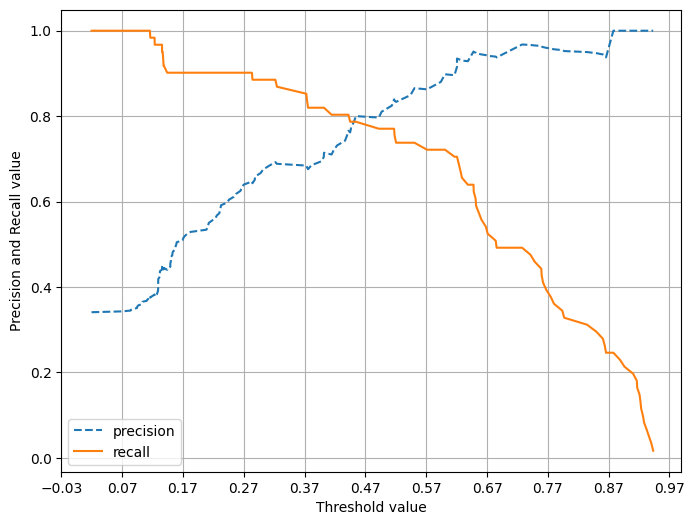

In [19]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
# %matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall') 

    start, end = plt.xlim() 
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [22]:
from sklearn.metrics import f1_score 

f1 = f1_score(y_test, pred)
print(f1)

0.7966101694915254


In [23]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    f1 = f1_score(y_test, pred)
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}')

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,  1].reshape(-1, 1), thresholds)

0.4
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576
0.45
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869
0.5
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966
0.55
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1: 0.7965
0.6
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1: 0.8000


In [24]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5) 
print(thr_index)
print(np.round(thresholds[thr_index], 2)) 

print(np.round(fprs[thr_index], 3))
print(np.round(tprs[thr_index], 3))

[ 1  6 11 16 21 26 31 36 41 46]
[0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
[0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
[0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


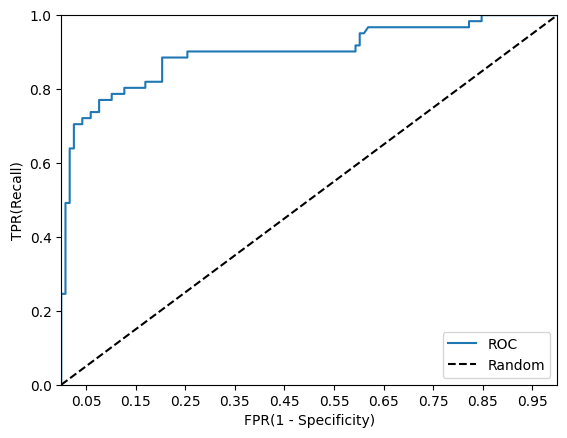

In [25]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1) 

    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim() 
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend() 
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [26]:
from sklearn.metrics import roc_auc_score 

pred_proba = lr_clf.predict_proba(X_test)[:, 1] 
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC 값: {roc_score:.4f}')

ROC AUC 값: 0.8987


In [27]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print(f'오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}')